# Make gwylm class understand directory and scentry as 1st input

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
#
# from os import system
# system('source ~/.virtual_enviroments/ringdownFD_nikhef/bin/activate')
from nrutils import scsearch,gwylm,FinalSpin0815,EradRational0815,simdir2scentry
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
import corner
#
from numpy import *

(positive)>> Applying custom matplotlib settings.


### Define a low-level package function to convert a directory into a list of simulation catalog objects

In [2]:
sim_dir = '/Users/book/MOUNT/tmp/mnt/hogshead/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a28_ph0_th60/'
sce = simdir2scentry( sim_dir, verbose=False )

(bam.py)>> Initial parameters corresponding to the bbh file's aftrejunktime will be used to populate metadata.
(bam.py!)>> Warning: The estimated after junk binary separation is significantly different than the value stored in the bbh file: x from calculation = 11.248633, x from bbh file=11.472200. The user should understand whether this is an erorr or not.


### Print the properties of the "on-the-fly" catalog entry

In [3]:
a = sce[0]
for k in a.__dict__:
    print '%s \t = \t %s'%(k,a.__dict__[k])

metadata_file_location 	 = 	 /Users/book/MOUNT/tmp/mnt/hogshead/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a28_ph0_th60/q2_a10_a28_ph0_th60.bbh
verbose 	 = 	 False
S2 	 = 	 [-6 -6 -6]
S1 	 = 	 [-0.144636  0.305998  0.109113]
xf 	 = 	 0.689794559629
static 	 = 	 True
unstring 	 = 	 False
source_dir 	 = 	 []
overwrite 	 = 	 False
log 	 = 	 [Log for <nrutils.core.nrsc.scentry instance at 0x115f9e5f0>] The file is "/Users/book/MOUNT/tmp/mnt/hogshead/NR_data/ReducedData-hogshead/chinmay_precessingRuns/q2_a10_a28_ph0_th60/q2_a10_a28_ph0_th60.bbh". This entry's metadata file is valid.
isafterjunk 	 = 	 True
label 	 = 	 1chi0.80-2chi93.53-p-q2.00
note 	 = 	 Initial parameters corresponding to the bbh file's aftrejunktime will be used to populate metadata.Warning: The estimated after junk binary separation is significantly different than the value stored in the bbh file: x from calculation = 11.248633, x from bbh file=11.472200. The user should understand whether this is an eror

### Use the same directory as above to create a gwylm object outside of a pre-built catalog file
NOTE: You will likely want to turn verbose off unless there's an issue.

In [4]:
y = gwylm(sim_dir,lmax=3,verbose=False,clean=True,dt=0.5)

(gwylm!)>> You have input a directory rather than an scentry object. We will try to convert the directory to an scentry object, but this is slower than using the our catalog system. Please consider modifying the appropriate configuretion file (i.e. in "/Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/config/") to accommodate your new simulation, or perhaps create a new configuration file. Given your new or updated configuration file, please run nrutils.scbuild("my_config_name") to update your local catalog. If you are confident that all has gone well, you may also wish to push changes in your catalog (to the master repo). Live long and prosper. -- Lionel
(bam.py!)>> Warning: The afterjunk spins appear to have been stored incorrectly. All parameters according to the initial data (as stored in the bbh files) will be stored. 


### Plot some of the loaded waveform data

([<matplotlib.axes._subplots.AxesSubplot at 0x11cf59a90>,
 <matplotlib.figure.Figure at 0x119998ad0>)

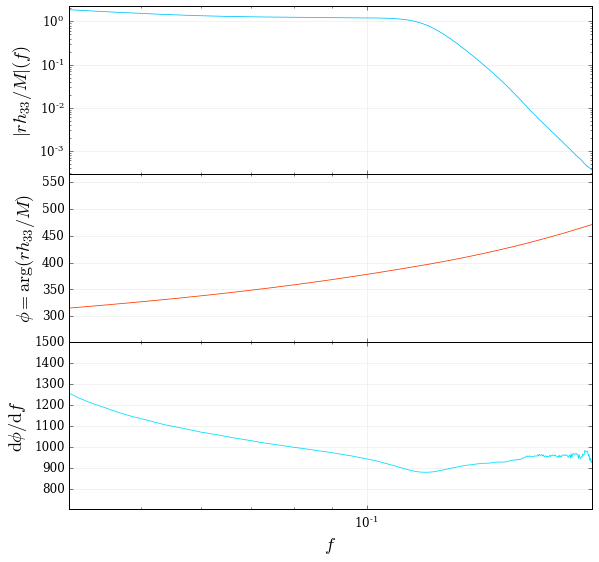

In [29]:
y.lm[3,3]['strain'].plot(flim=[4e-2,0.2],domain='freq')

(<matplotlib.axes._subplots.MollweideAxesSubplot at 0x109496e90>, 2250.0)

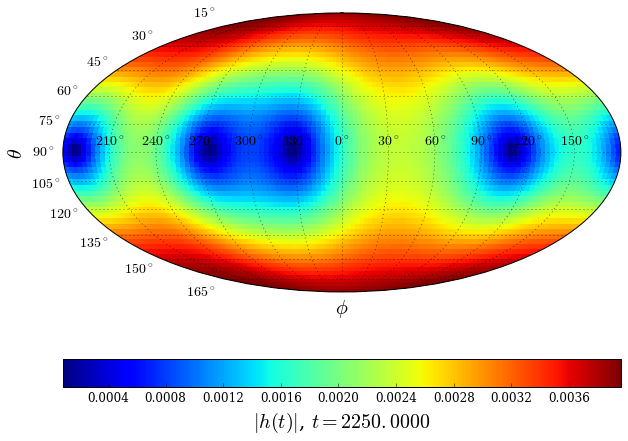

In [6]:
y.mollweide_plot(time=2250-y.lm[2,2]['strain'].intrp_t_amp_max,form='abs')